In [ ]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2024-09-11 06:43:10--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.118.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G  24.0MB/s    in 1m 43s  

2024-09-11 06:44:53 (22.6 MB/s) - ‘speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



In [ ]:
import os

if os.path.exists('/content/drive'):
    print("Google Drive is mounted.")
else:
    print("Google Drive is not mounted.")

Google Drive is not mounted.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xzvf speech_commands_v0.02.tar.gz -C /content/drive/MyDrive/Speech

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [4]:
import os

data_path = '/content/drive/My Drive/Speech'

# List of categories (folders) in the dataset
categories = os.listdir(data_path)
# List and sort categories alphabetically
categories = sorted([cat for cat in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cat))])
print(f"Categories (sorted alphabetically): {categories}")
print(f"Total categories: {len(categories)}")

Categories (sorted alphabetically): ['_background_noise_', 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']
Total categories: 36


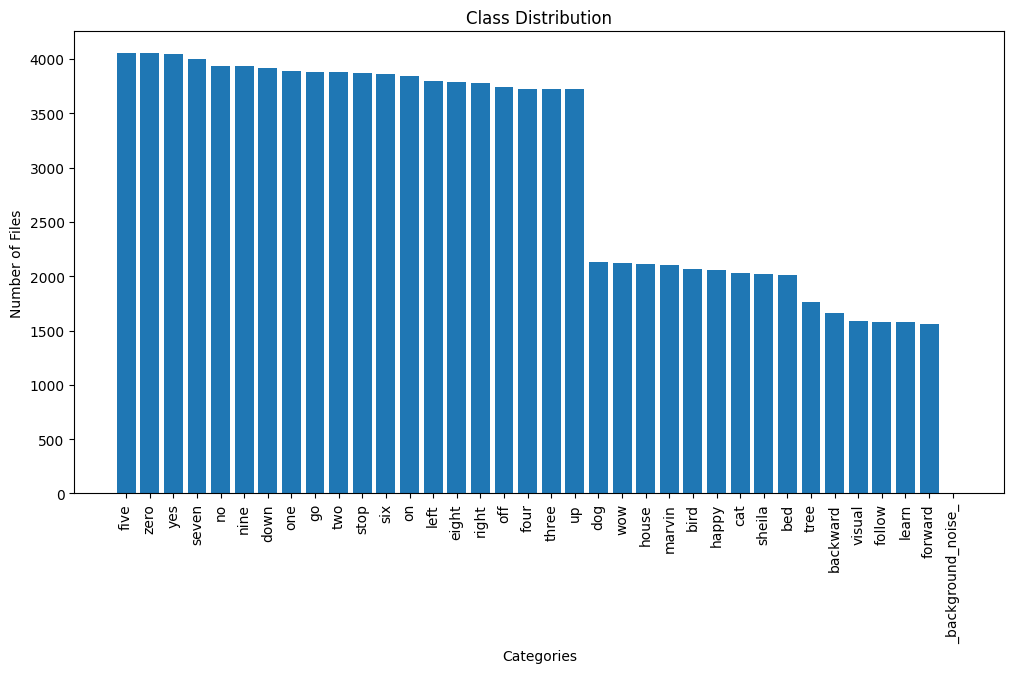

In [ ]:
import matplotlib.pyplot as plt

categories_sorted = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

labels, counts = zip(*categories_sorted)

plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.xlabel("Categories")
plt.ylabel("Number of Files")
plt.show()

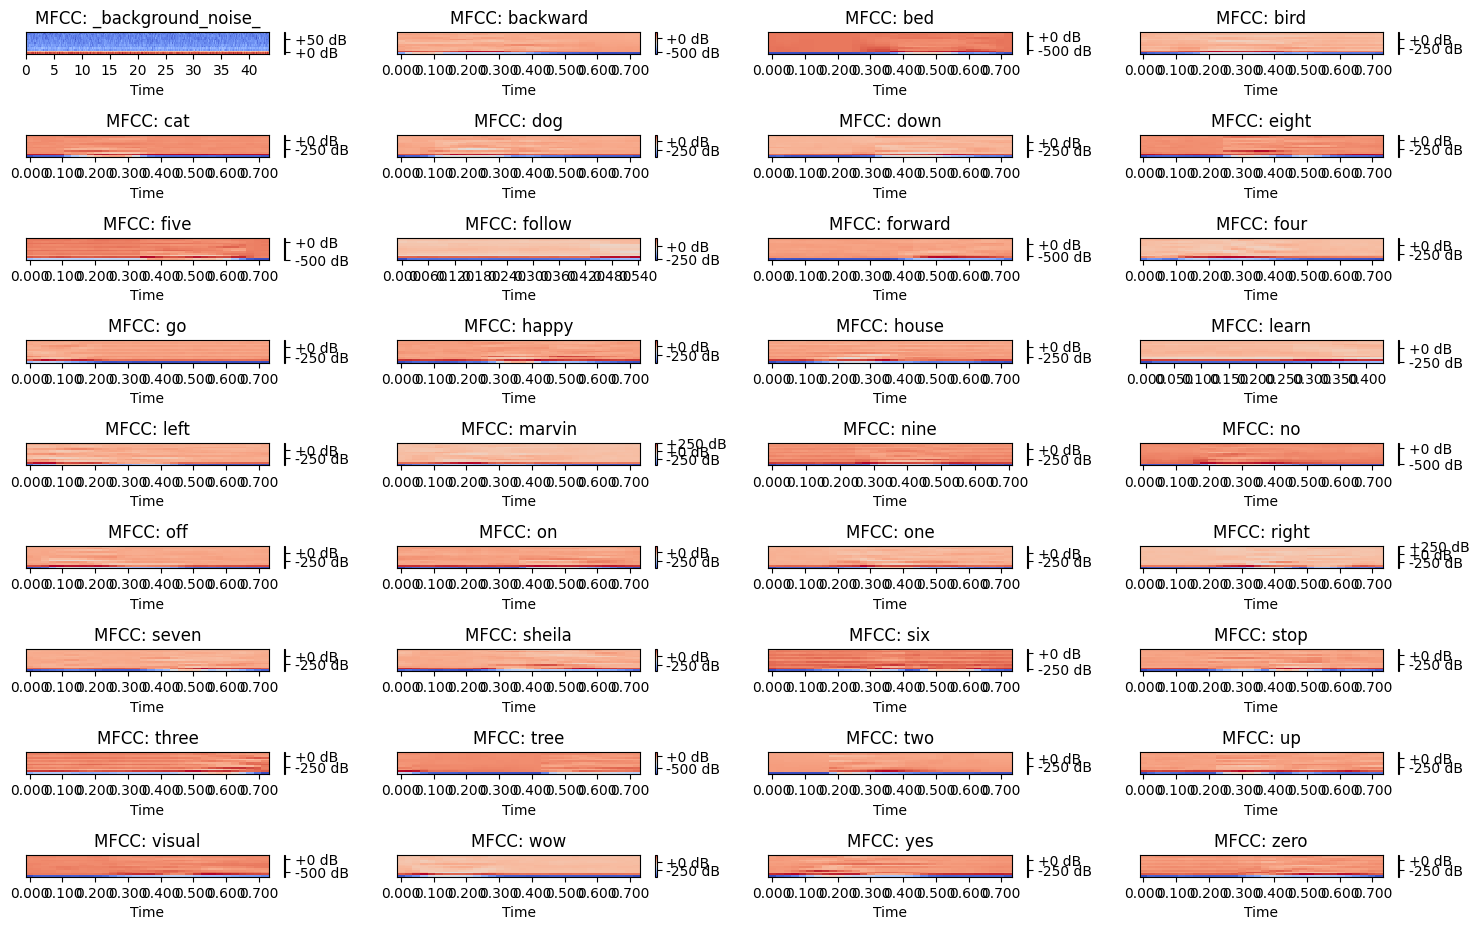

In [ ]:
import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display

# Function to extract MFCCs from an audio file
def extract_mfcc(file_path, num_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Select one file from each category
sample_mfccs = {}

for category in categories:
    category_path = os.path.join(data_path, category)

    # Pick the first valid .wav file in the category
    wav_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]

    if wav_files:  # Check if there are any wav files
        file_name = wav_files[0]
        file_path = os.path.join(category_path, file_name)
        mfcc = extract_mfcc(file_path)

        if mfcc is not None:
            sample_mfccs[category] = mfcc

# Convert MFCCs to DataFrame for each class
mfcc_dataframes = {}

for category, mfcc in sample_mfccs.items():
    df = pd.DataFrame(mfcc.T)  # Transpose to get time on x-axis, coefficients on y-axis
    mfcc_dataframes[category] = df

# Plot MFCCs for comparison between classes
plt.figure(figsize=(15, 10))

for i, (category, mfcc_df) in enumerate(mfcc_dataframes.items()):
    plt.subplot(len(categories) // 4 + 1, 4, i+1)  # Adjust subplot layout for clarity
    librosa.display.specshow(sample_mfccs[category], x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC: {category}')

plt.tight_layout()
plt.show()

In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tqdm import tqdm

# Set the dataset path
data_path = '/content/drive/My Drive/Speech'
categories = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

# Function to extract MFCC features with error handling and padding/trimming
def extract_features(file_path, max_length=44):  # Adjust max_length based on your dataset
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        # Pad or truncate the MFCC to ensure uniform length
        mfcc = librosa.util.fix_length(mfcc, size=max_length, axis=1)
        return mfcc
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Prepare dataset
X = []
y = []

# Extract features and labels from each category
for category in tqdm(categories):
    category_path = os.path.join(data_path, category)
    wav_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]

    for wav_file in wav_files:
        file_path = os.path.join(category_path, wav_file)
        mfcc = extract_features(file_path)
        if mfcc is not None:  # Skip if file processing failed
            X.append(mfcc)
            y.append(category)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels to numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode the labels
y_categorical = to_categorical(y_encoded, num_classes=len(categories))

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape data for CNN input (CNN expects 4D tensor)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN model
model = Sequential()

# 2D convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add additional convolution and pooling layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save('/content/drive/My Drive/Speech/command_classifier.h5')

 28%|██▊       | 10/36 [07:05<22:22, 51.64s/it]

In [13]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


dataset_path = '/content/drive/My Drive/Speech'

# Hyperparameters
SAMPLE_RATE = 16000  # 16kHz sampling rate
N_MFCC = 13          # Number of MFCC features
AUDIO_DURATION = 1   # 1 second duration
N_CLASSES = 10       # Number of commands to classify (you can adjust)

# List of commands (update this list if you want to classify more/less commands)
commands = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

# Load and preprocess audio files
def load_audio_files(dataset_path, commands):
    X = []
    y = []
    for label in commands:
        folder_path = os.path.join(dataset_path, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            # Load the audio file and ensure it's the correct length
            y_audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=AUDIO_DURATION)
            # Extract MFCC features
            mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=N_MFCC)
            mfcc = np.mean(mfcc.T, axis=0)  # Take mean across time
            X.append(mfcc)
            y.append(label)
    return np.array(X), np.array(y)

# Load data
X, y = load_audio_files(dataset_path, commands)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
X_train = X_train / np.max(np.abs(X_train), axis=0)
X_test = X_test / np.max(np.abs(X_test), axis=0)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple dense neural network
def build_model(input_shape, n_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model(X_train.shape[1], len(commands))

# Print model summary
model.summary()
